In [1]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
# !ls "/content/drive/"
!ls "/content/drive/My Drive/636/data/clips"

10.mp4	19.mp4	27.mp4	35.mp4	43.mp4	51.mp4	5.mp4	68.mp4	76.mp4	84.mp4
11.mp4	1.mp4	28.mp4	36.mp4	44.mp4	52.mp4	60.mp4	69.mp4	77.mp4	85.mp4
12.mp4	20.mp4	29.mp4	37.mp4	45.mp4	53.mp4	61.mp4	6.mp4	78.mp4	8.mp4
13.mp4	21.mp4	2.mp4	38.mp4	46.mp4	54.mp4	62.mp4	70.mp4	79.mp4	9.mp4
14.mp4	22.mp4	30.mp4	39.mp4	47.mp4	55.mp4	63.mp4	71.mp4	7.mp4
15.mp4	23.mp4	31.mp4	3.mp4	48.mp4	56.mp4	64.mp4	72.mp4	80.mp4
16.mp4	24.mp4	32.mp4	40.mp4	49.mp4	57.mp4	65.mp4	73.mp4	81.mp4
17.mp4	25.mp4	33.mp4	41.mp4	4.mp4	58.mp4	66.mp4	74.mp4	82.mp4
18.mp4	26.mp4	34.mp4	42.mp4	50.mp4	59.mp4	67.mp4	75.mp4	83.mp4


In [0]:
from IPython.display import YouTubeVideo

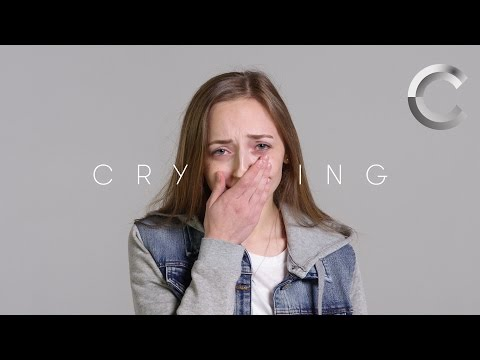

In [0]:
YOUTUBE_ID = 'vv2qnoUfjPU'
YouTubeVideo(YOUTUBE_ID)

In [0]:
!pip install -q youtube-dl

In [0]:
# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID

[youtube] vv2qnoUfjPU: Downloading webpage
[download] youtube.mp4 has already been downloaded
[download] 100% of 20.66MiB


Split video into pictures

In [10]:
!ls "/content/drive/My Drive/636/data"

clips		download.sh	       manual.ipynb  split_to_pics.ipynb
clip.sh		frames_all	       raw_txt	     txt
clipToFrame.sh	get_movie_clips.ipynb  raw_video


In [0]:
!cd "/content/drive/My Drive/636/data"

In [15]:
!chmod u+x clipToFrame.sh
!./clipToFrame.sh

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [0]:
# !rm -rf frames

Get info about this video

In [0]:
!ffmpeg -i youtube.mp4

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

Zip pics and upload to google drive

In [0]:
!zip -r ./frames.zip ./frames

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
filename = 'frames.zip'
uploaded = drive.CreateFile({'title': filename})
uploaded.SetContentFile(filename)
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1IxBo4zhltlKQXcGSeZeqimVjmpvoffyB
